**MLP (Multiplayer Perceptrons) with MNIST Dataset**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import sklearn
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from sklearn.metrics import accuracy_score



In [2]:
#Load train dataset of MNIST 
train_dataset = datasets.MNIST(root ='./data',
                            train=True,
                            transform = transforms.ToTensor(),
                            download = True)

#Load test dataset of MNIST
test_dataset = datasets.MNIST(root = './data',
                           train=False,
                           transform = transforms.ToTensor())

# Control for MNIST Dataset
n_train = len(train_dataset)
n_test=len(test_dataset)
print("Size of Train Dataset:",n_train)
print("Size of Test Dataset:",n_test)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Size of Train Dataset: 60000
Size of Test Dataset: 10000


shape: torch.Size([1, 28, 28]) 
Label: 5


<function matplotlib.pyplot.show>

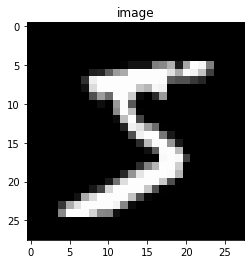

In [3]:
image,label = train_dataset[0]
print('shape:',image.shape, '\nLabel:',label)
plt.imshow(image.reshape((28,28)),cmap="gray")
plt.title("image")
plt.show

**MLP:** A multilayer perceptron has Dense layers of neurons in it, hence the name multi-layer.


**y = wx + b**
where x denotes the input neuron
w : weights
b : bias.

There 3 basic components:
1. Input Layer
2.Output Layer
3. Hidden Layers

Define **MLP**

In [4]:
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=500, shuffle=False)

#define our model network model
# our neural network model : Multilayer Perceptron

class MultilayerPerceptron(nn.Module):
  def __init__(self, input_size=784, output_size=10, layers=[120,84]):
    super().__init__()
    self.d1 = nn.Linear(input_size,layers[0]) #hidden layer 1
    self.d2 = nn.Linear(layers[0],layers[1])  #hidden layer 2
    self.d3 = nn.Linear(layers[1],output_size)

  def forward(self,X):
    X = F.relu(self.d1(X))
    X = F.relu(self.d2(X))
    X = self.d3(X)

    return F.log_softmax(X,dim=1)
    


In [5]:
model = MultilayerPerceptron()
print(model)

MultilayerPerceptron(
  (d1): Linear(in_features=784, out_features=120, bias=True)
  (d2): Linear(in_features=120, out_features=84, bias=True)
  (d3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
#define cross entropy loss and optimizer
learning_rate = 0.001
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

**Training the Neural Network**

In [7]:
epochs = 50
train_losses = []
test_losses = []
train_correct = []
test_correct = []

iteration = 0
for i in range(epochs):
  train_crr = 0
  test_crr = 0

  for iteration,(x_train, y_train) in enumerate(train_loader):
    iteration += 1

    # Apply the Model
    y_pred = model(x_train.view(100,-1))
    new_loss = loss(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_correct = (predicted == y_train).sum()
    train_crr += batch_correct

    # update parameters
    optimizer.zero_grad()
    new_loss.backward()
    optimizer.step()

  train_losses.append(new_loss)
  train_correct.append(train_crr)

# run the test dataset
  with torch.no_grad():
    for iteration,(x_test,y_test) in enumerate(test_loader):

      #apply the model 
      y_validation = model(x_test.view(500,-1))
      new2_loss = loss(y_validation,y_test)

      predicted = torch.max(y_validation,1)[1]
      test_crr += (predicted == y_test).sum()
      #accuracy = 100*test_crr/len(test_loader)


      if iteration % 600 == 0:
        print(f'epoch: {i:2} Validation Loss: {new2_loss.item():10.8f} Test Accuracy: {(test_crr.item()*200/1000)}%')

  test_losses.append(new2_loss)
  test_correct.append(test_crr)



epoch:  0 Validation Loss: 0.18832950 Test Accuracy: 94.6%
epoch:  1 Validation Loss: 0.11133634 Test Accuracy: 96.4%
epoch:  2 Validation Loss: 0.09160961 Test Accuracy: 97.8%
epoch:  3 Validation Loss: 0.08017974 Test Accuracy: 97.4%
epoch:  4 Validation Loss: 0.07281042 Test Accuracy: 97.8%
epoch:  5 Validation Loss: 0.06797275 Test Accuracy: 98.0%
epoch:  6 Validation Loss: 0.08186118 Test Accuracy: 97.2%
epoch:  7 Validation Loss: 0.07903555 Test Accuracy: 97.8%
epoch:  8 Validation Loss: 0.08958301 Test Accuracy: 97.8%
epoch:  9 Validation Loss: 0.06620428 Test Accuracy: 97.4%
epoch: 10 Validation Loss: 0.05371802 Test Accuracy: 98.2%
epoch: 11 Validation Loss: 0.10430393 Test Accuracy: 97.6%
epoch: 12 Validation Loss: 0.05883665 Test Accuracy: 98.0%
epoch: 13 Validation Loss: 0.09760056 Test Accuracy: 97.4%
epoch: 14 Validation Loss: 0.10647403 Test Accuracy: 97.6%
epoch: 15 Validation Loss: 0.10555209 Test Accuracy: 97.8%
epoch: 16 Validation Loss: 0.10178598 Test Accuracy: 98.

In [8]:
#for Train 
for i in range(epochs):

  for iteration,(x_train, y_train) in enumerate(train_loader):
    iteration += 1

    # Apply the Model
    y_pred = model(x_train.view(100,-1))
    new_loss = loss(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_correct = (predicted == y_train).sum()
    train_crr += batch_correct

    if iteration % 600 == 0:
        print(f'epoch: {i:2} Train Loss: {new_loss.item():10.8f}')

    # update parameters
    optimizer.zero_grad()
    new_loss.backward()
    optimizer.step()

  train_losses.append(new_loss)
  train_correct.append(train_crr)

epoch:  0 Train Loss: 0.01708739
epoch:  1 Train Loss: 0.00015567
epoch:  2 Train Loss: 0.00032915
epoch:  3 Train Loss: 0.00020012
epoch:  4 Train Loss: 0.00002150
epoch:  5 Train Loss: 0.00000734
epoch:  6 Train Loss: 0.00348270
epoch:  7 Train Loss: 0.00000726
epoch:  8 Train Loss: 0.00791215
epoch:  9 Train Loss: 0.00045472
epoch: 10 Train Loss: 0.00000020
epoch: 11 Train Loss: 0.00202290
epoch: 12 Train Loss: 0.00000728
epoch: 13 Train Loss: 0.01574012
epoch: 14 Train Loss: 0.01857161
epoch: 15 Train Loss: 0.00007251
epoch: 16 Train Loss: 0.00034478
epoch: 17 Train Loss: 0.00674353
epoch: 18 Train Loss: 0.00241269
epoch: 19 Train Loss: 0.00001752
epoch: 20 Train Loss: 0.03316377
epoch: 21 Train Loss: 0.00000067
epoch: 22 Train Loss: 0.01126305
epoch: 23 Train Loss: 0.00002534
epoch: 24 Train Loss: 0.00000099
epoch: 25 Train Loss: 0.00111296
epoch: 26 Train Loss: 0.00006940
epoch: 27 Train Loss: 0.00004762
epoch: 28 Train Loss: 0.00005163
epoch: 29 Train Loss: 0.02792400
epoch: 30 

**Training Curve**

<function matplotlib.pyplot.show>

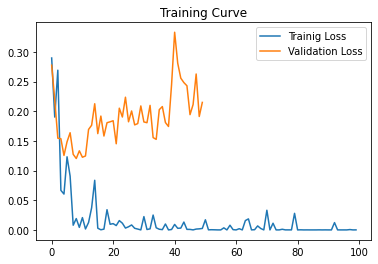

In [9]:
plt.plot(train_losses,label='Trainig Loss')
plt.plot(test_losses,label='Validation Loss')
plt.title('Training Curve')
plt.legend(('Trainig Loss', 'Validation Loss'))
plt.show




Karşılaştırma: Error sonucu 0.98 gelmiştir.SVM ile eğitmemiz sonucunda 0.91 gelmişti. Bu demek oluyor ki neural network kullanarak daha sağlıklı sonuçlar elde ediyoruz.